# Data Cleaning

First pass reduces 10,000 variables to 123

Second pass (PCA) reduces 123 variables to 55

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(28)

data = pd.read_csv("dorothea_smaller.csv")

In [2]:
data_out = pd.DataFrame(data['y.train'])
data_in = data.drop(columns = ['y.train','Unnamed: 0'])

In [3]:
l_bound = 0.05  #If data varies in less than 5% of cases, it is deemed not significant
u_bound = 1 - l_bound
data_cut = data_in

In [35]:
for i in range(len(data_in.columns)):  #Note: this loop takes approx. 9 mins to run (for my crappy laptop)
    if sum(data_in.iloc[:,i]) <= (l_bound * len(data_in)):
        data_cut = data_cut.drop(data_in.columns[i], axis=1)
    elif sum(data_in.iloc[:,i]) >= (u_bound * len(data_in)):
        data_cut = data_cut.drop(data_in.columns[i], axis=1)

data_cut.to_csv('data_cut.csv')

print("Variables: " + str(len(data_cut.columns)))

Variables: 123


In [4]:
data_mod = pd.read_csv("data_cut.csv")
#df.insert(124,"Output",data_out,True)
data_mod = data_mod.drop(columns = ['Unnamed: 0'])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [6]:
n_PCA = 0 #Number of Principal Components
sum_var = 0 #Variance retained by reduced number of components
var_tgt = 0.6 #Target retained variance
x=StandardScaler().fit_transform(data_mod.values)

for j in range(1, len(data_mod.columns) - 1):
    if sum_var < var_tgt:
        n_PCA = j
        data_pca = decomposition.PCA(n_components = n_PCA)
        principalComponents = data_pca.fit_transform(x)
        var = data_pca.explained_variance_ratio_
        sum_var += var[j - 1]
        print("No. Components: " + str(n_PCA) +
              "   Retained Variance: " + str(round(sum_var, 3)))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


No. Components: 1   Retained Variance: 0.026
No. Components: 2   Retained Variance: 0.044
No. Components: 3   Retained Variance: 0.06
No. Components: 4   Retained Variance: 0.074
No. Components: 5   Retained Variance: 0.088
No. Components: 6   Retained Variance: 0.102
No. Components: 7   Retained Variance: 0.116
No. Components: 8   Retained Variance: 0.13
No. Components: 9   Retained Variance: 0.143
No. Components: 10   Retained Variance: 0.156
No. Components: 11   Retained Variance: 0.169
No. Components: 12   Retained Variance: 0.182
No. Components: 13   Retained Variance: 0.194
No. Components: 14   Retained Variance: 0.206
No. Components: 15   Retained Variance: 0.218
No. Components: 16   Retained Variance: 0.229
No. Components: 17   Retained Variance: 0.241
No. Components: 18   Retained Variance: 0.252
No. Components: 19   Retained Variance: 0.263
No. Components: 20   Retained Variance: 0.275
No. Components: 21   Retained Variance: 0.286
No. Components: 22   Retained Variance: 0.296

In [7]:
data_pca.components_

array([[-0.03366407,  0.00348501, -0.01493223, ..., -0.01834555,
        -0.02635693,  0.00447634],
       [ 0.05211772, -0.07552121,  0.00077345, ...,  0.00817139,
        -0.0851335 , -0.01463177],
       [-0.08209263, -0.132061  ,  0.03181492, ...,  0.0631916 ,
        -0.03442856,  0.05828083],
       ...,
       [-0.10352703, -0.03252971,  0.01034426, ..., -0.02464152,
         0.08182344, -0.00860182],
       [ 0.20918158,  0.03058111,  0.07259569, ..., -0.10280425,
         0.02873711, -0.03646938],
       [ 0.10898076,  0.08216798,  0.07498705, ..., -0.04810436,
        -0.1732211 , -0.01811855]])

In [8]:
principalDf = pd.DataFrame(data = principalComponents)

In [9]:
principalDf #Rows = Data input row; total no.rows = 800
#Columns = Each variable value (i.e. 0 or 1) multiplied by that variable's PCA coefficient
#One column for each set of PCA coefficients; total no. columns = n_PCA

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.394898,-0.779215,-0.091560,1.331585,-1.773086,1.414320,1.186985,0.027341,0.144208,1.917621,...,1.630099,-0.234315,2.125667,0.407439,0.583362,-0.133640,0.484533,-1.265023,0.811497,0.841582
1,-0.590640,0.583036,-0.504973,-0.190210,1.686787,2.710782,-5.014998,-0.232213,-1.414165,-0.896510,...,-1.177913,0.388779,-0.277676,-0.835208,1.707358,-0.483425,-1.164391,0.355304,-1.176264,-0.030736
2,-0.521765,-0.436673,-1.526195,1.379907,1.243072,0.890823,1.792969,-0.956766,-0.562397,0.173173,...,2.051075,-1.141339,1.035312,-2.218202,-2.407782,-0.715760,-0.851131,0.266844,1.244059,0.619549
3,-0.312144,-0.594815,-1.268492,-0.236415,0.538384,1.135980,1.442628,0.450335,0.225334,1.458354,...,0.636557,0.844510,0.364387,-1.169137,0.615529,0.990128,0.835530,0.253949,1.771665,0.037796
4,-0.547816,-0.976416,-0.203022,0.572909,0.461418,-0.687093,-0.747017,0.235132,0.410076,2.546440,...,-0.418635,-1.335774,0.877011,-2.570885,-0.848708,-1.872027,-1.060239,-0.226701,-2.106726,1.009405
5,-1.399074,-1.693674,2.054039,1.448213,-1.304868,-0.436919,0.306757,1.294541,-0.343034,0.253463,...,-1.692347,-2.065426,-0.212498,-0.503264,0.928614,0.007716,0.471219,0.163655,-0.326022,-0.930623
6,-0.568488,0.054120,-0.581532,-0.777665,1.438727,-0.437542,0.603971,-1.625355,-1.588183,2.575181,...,-0.198599,0.033018,-0.751029,-0.922717,-0.536714,1.111732,0.985766,1.069952,-1.314694,0.509859
7,-0.606657,-0.649210,-2.435179,-0.761451,4.469906,-3.146984,-0.545381,0.486720,-1.193710,0.338027,...,-1.815986,-0.828486,-1.047188,0.145889,1.973221,0.575657,0.376269,0.431592,0.728706,1.139360
8,-0.725992,-0.410098,0.442902,-0.626880,0.167728,-0.792091,0.051952,-1.065685,-1.224249,0.602238,...,-0.606909,-0.154274,-0.687862,-0.232774,0.661298,0.235947,-0.223839,-0.130545,-0.146229,1.645169
9,0.140028,-0.797874,-0.815618,1.290314,-0.491891,0.535675,0.822001,-1.126421,1.320917,-2.480765,...,-0.496195,0.028630,-1.329156,1.260642,-2.306784,0.980319,2.026788,-0.903391,-0.006783,-1.466561


# Clustering

Currently not functioning

Aim is to fit the 55 variables to 2 clusters, and compare the distribution of active/inactive samples between these 2 clusters

In [10]:
from sklearn import cluster

In [11]:
kmeans= cluster.KMeans(n_clusters = 2)
kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
#These can be used to generate scatter plots of the clustering
#This may determine which PCA variable/s is/are the most important in predicting drug activity

#clust1=np.where(kmeans.labels_==0)
#clust2=np.where(kmeans.labels_==1)

In [12]:
clust = kmeans.labels_

In [31]:
activity = data_out.values
active = activity.flatten()

In [ ]:
#  !! ERROR IN THIS SECTION !!

pd.crosstab(clust,active)

# Neural Network

Machine learning to predict drug classification (active/inactive) with >90% accuracy

In [110]:
from sklearn.model_selection import train_test_split

In [25]:
inputs = data_mod.to_numpy()

In [26]:
data_out_mod1 = (data_out + 1) / 2 #Inactive = 0, Active = 1
data_out_mod2 = 0.5 - (data_out / 2) #Inactive = 1, Active = 0
outputs = np.concatenate((data_out_mod1,data_out_mod2),axis=1)

In [27]:
train_x, test_x, train_y, test_y = train_test_split(inputs, outputs, test_size=0.25, random_state=28)

In [58]:
def sigmoid(x):
    # This is not strictly sigmoid, but more stable when handling matrices
    return .5 * (1 + np.tanh(.5 * x))
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

learning_rate = 0.001
num_epochs = 5000

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 8

# Initialise weights in the range -1 to 1
# Hidden layer weights with shape = number of input features x number of hidden nodes
hidden_weights = np.random.uniform(-1, 1, size=(num_features, num_hidden_nodes))
hidden_bias = np.random.uniform(-1, 1, size=(1, num_hidden_nodes))
# Output layer weights with shape = number of hidden nodes x number of output classes
output_weights = np.random.uniform(-1, 1, size=(num_hidden_nodes, num_classes))
output_bias = np.random.uniform(-1, 1, size=(1, num_classes))

# For recording error and accuracy - for graph later
training_errors = []
testing_errors = []
training_accuracies = []
testing_accuracies = []

# Train for number of epochs
for epoch in range(num_epochs):

    # Forward pass
    input_layer = train_x
    # sigmoid( (W * X) + b)
    hidden_layer = sigmoid(np.dot(input_layer, hidden_weights) + hidden_bias)
    output_layer = sigmoid(np.dot(hidden_layer, output_weights) + output_bias)

    # Backpropagation using gradient descent
    # Calculate output layer error
    output_layer_error = train_y - output_layer
    # Calculate output layer derivative Note: that we just need this layers error for the bias
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer)
    output_bias_delta = np.sum(output_layer_error, axis=0)
    
    # Calculate hidden layer error (from the output layers weights and derivative
    hidden_layer_error = output_layer_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)
    hidden_bias_delta = np.sum(hidden_layer_error, axis=0)

    # Update the weights (learning rate X layers input X layers derivative)
    output_weights += learning_rate * hidden_layer.T.dot(output_layer_delta)
    output_bias += learning_rate * output_bias_delta
    
    hidden_weights += learning_rate * input_layer.T.dot(hidden_layer_delta)
    hidden_bias += learning_rate * hidden_bias_delta

    # Every 100 epochs record error and accuracy during training
    if (epoch % 100) == 0:
        
        # Mean squared error over all errors this epoch
        error = 0.5 * np.mean(np.abs(output_layer_error)) ** 2
        training_errors.append(error)

        accuracy_count = 0
        for i in range(len(output_layer)):
          
            # Get the prediction i.e. the output with the highest value
            prediction = np.argmax(output_layer[i])
            # Get the actual label
            actual_label = np.argmax(train_y[i])
            
            # If they match the prediction was correct
            if prediction == actual_label:
                accuracy_count += 1
        accuracy = (100 / len(train_x)) * accuracy_count
        training_accuracies.append(accuracy)
        
        # Input test data to determine testing errors
        input_layer_test = test_x
        hidden_layer_test = sigmoid(np.dot(input_layer_test, hidden_weights) + hidden_bias)
        output_layer_test = sigmoid(np.dot(hidden_layer_test, output_weights) + output_bias)
        
        output_layer_error_test = test_y - output_layer_test
        error_test = 0.5 * np.mean(np.abs(output_layer_error_test)) ** 2
        testing_errors.append(error_test)
        
        accuracy_count_test = 0
        for i in range(len(output_layer_test)):
          
            prediction_test = np.argmax(output_layer_test[i])
            actual_label_test = np.argmax(test_y[i])
            
            if prediction_test == actual_label_test:
                accuracy_count_test += 1
        accuracy_test = (100 / len(test_x)) * accuracy_count_test
        testing_accuracies.append(accuracy_test)
        
        
#        print("Epoch: " + str(epoch) +
#              " Error: " + str(round(error, 5)) +
#              " Accuracy: " + str(round(accuracy, 3)) + "%" +
#              " T_Error: " + str(round(error_test, 5)) +
#              " T_Accuracy: " + str(round(accuracy_test, 3)) + "%")
                


Epoch: 0 Error: 0.19651 Accuracy: 9.833% T_Error: 0.1386 T_Accuracy: 36.5%
Epoch: 100 Error: 0.01472 Accuracy: 90.5% T_Error: 0.01632 T_Accuracy: 89.5%
Epoch: 200 Error: 0.01434 Accuracy: 90.5% T_Error: 0.01601 T_Accuracy: 89.5%
Epoch: 300 Error: 0.01392 Accuracy: 90.5% T_Error: 0.01565 T_Accuracy: 89.5%
Epoch: 400 Error: 0.01339 Accuracy: 90.5% T_Error: 0.01516 T_Accuracy: 89.5%
Epoch: 500 Error: 0.01269 Accuracy: 90.5% T_Error: 0.01447 T_Accuracy: 89.5%
Epoch: 600 Error: 0.01179 Accuracy: 90.5% T_Error: 0.01355 T_Accuracy: 89.5%
Epoch: 700 Error: 0.01073 Accuracy: 90.5% T_Error: 0.01245 T_Accuracy: 89.5%
Epoch: 800 Error: 0.00962 Accuracy: 90.667% T_Error: 0.01128 T_Accuracy: 89.5%
Epoch: 900 Error: 0.00859 Accuracy: 91.833% T_Error: 0.0102 T_Accuracy: 90.5%
Epoch: 1000 Error: 0.00772 Accuracy: 93.167% T_Error: 0.00928 T_Accuracy: 92.0%
Epoch: 1100 Error: 0.00701 Accuracy: 93.5% T_Error: 0.00853 T_Accuracy: 92.0%
Epoch: 1200 Error: 0.00643 Accuracy: 93.833% T_Error: 0.00793 T_Accurac

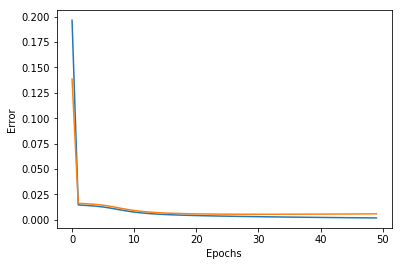

In [56]:
plt.plot(training_errors)
plt.plot(testing_errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

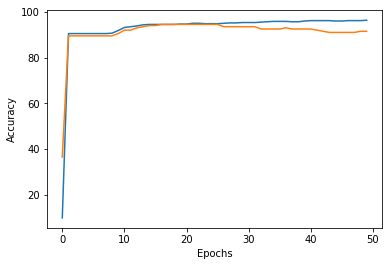

In [57]:
plt.plot(training_accuracies)
plt.plot(testing_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()